<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

## 1. Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we so often talk about the weather here in Ireland due to its erratic nature, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2. Imported libraries & modules:

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### 2.3 [Seaborn](https://seaborn.pydata.org/)
seaborn: statistical data visualization

In [56]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## 3. Athenry weather station.
For the final assignment of the module, we analyzed the weather station in Athenry, which I have chosen to use again. This station records a diverse range of data points, as listed below the code cell in 3.1. Unfortunately, the Circular Road station, which is closest to where I live, and the station in Oughterard, do not include temperature measurements, for example. The data was downloaded from this website: https://www.met.ie/climate/available-data/historical-data.

### 3.1 Inspecting the dataset.

In [57]:
# Load the data set.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [58]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


In [59]:
type(df)

pandas.core.frame.DataFrame

The data frames starts in March 2010 so I decided to remove those rows as well 2024 to only have complete years to work with:

In [60]:
df = df[df['year'].isin(range(2011, 2024))]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
10,2011,1,3.1,12.1,-6.3,6.6,-0.4,110.8,-9.9,5.7,37,
11,2011,2,6.4,14.2,-3.6,10.0,2.8,146.5,-6.0,7.7,48,
12,2011,3,6.3,16.3,-4.8,11.2,1.4,44.2,-7.9,6.0,52,
13,2011,4,11.0,21.8,2.0,15.9,6.0,66.9,-0.7,7.1,34,
14,2011,5,11.0,18.3,4.1,14.3,7.8,117.6,0.7,11.1,47,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


In [61]:
print(df.dtypes)

year       int64
month      int64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain      object
gmin      object
wdsp     float64
maxgt      int64
sun       object
dtype: object


We will analyze the metrics of average rainfall, temperature, and wind speed to determine if there is any correlation among them

C:\Users\User\AppData\Local\Temp\ipykernel_18436\3507268635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain'] = pd.to_numeric(df['rain'], errors='coerce')


Average Rainfall per Year:
    year        rain
0   2011  114.366667
1   2012  105.508333
2   2013   94.245455
3   2014  105.358333
4   2015  131.316667
5   2016   89.733333
6   2017  100.000000
7   2018   90.183333
8   2019  118.900000
9   2020  123.483333
10  2021   93.683333
11  2022   98.208333
12  2023  132.516667


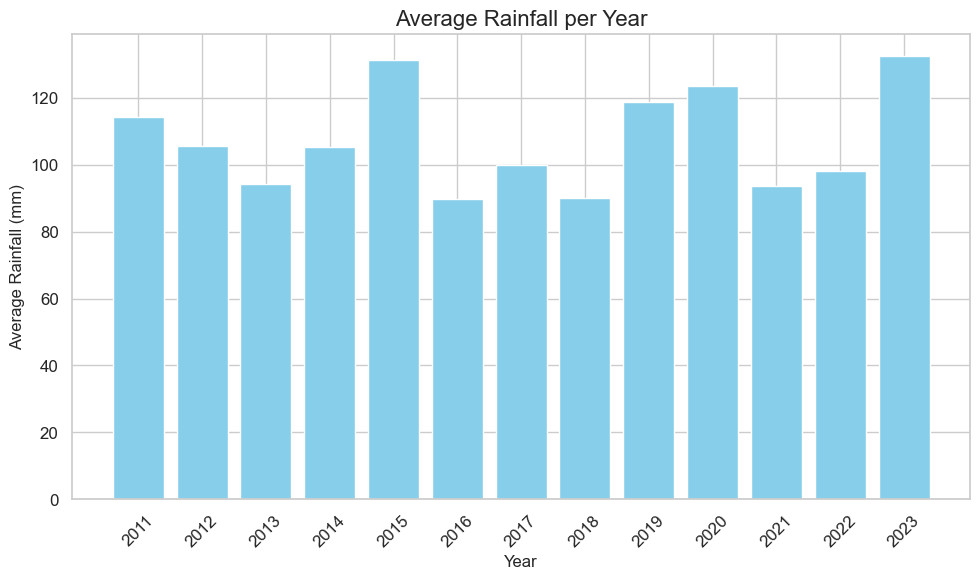

In [62]:
# Ensure the 'rain' column is numeric.
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Print the numeric output for each year's average rainfall.
print("Average Rainfall per Year:")
print(avg_rainfall_per_year)

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average Air Temperature per Year:
    year      meant
0   2011   9.775000
1   2012   9.525000
2   2013   9.625000
3   2014  10.041667
4   2015   9.358333
5   2016   9.750000
6   2017   9.925000
7   2018   9.750000
8   2019   9.825000
9   2020   9.908333
10  2021  10.225000
11  2022  10.266667
12  2023  10.800000


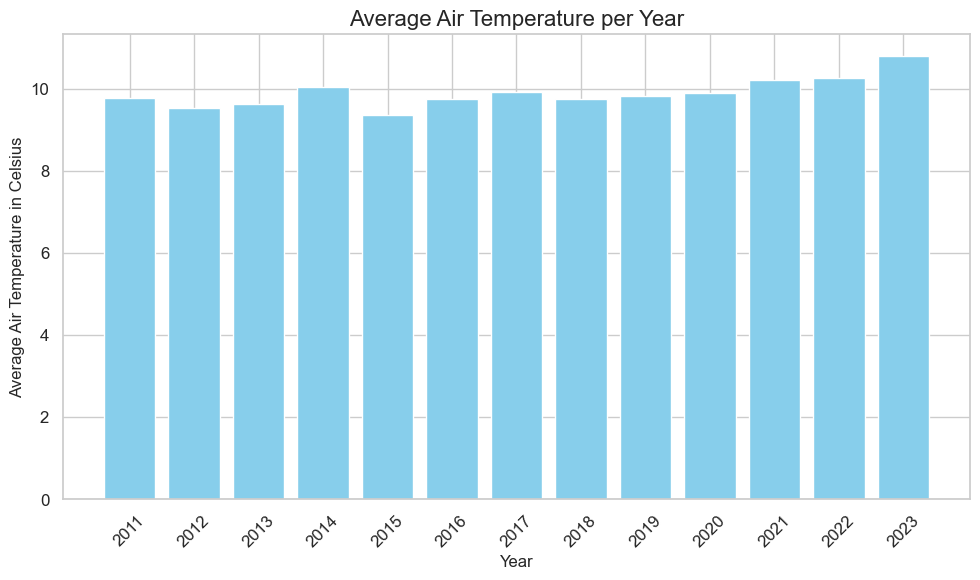

In [64]:
# Group by year and calculate average windspeed per year.
avg_atemp_per_year = df.groupby('year')['meant'].mean().reset_index()

# Print the numeric output for each year's average air temperature.
print("Average Air Temperature per Year:")
print(avg_atemp_per_year)

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_atemp_per_year['year'], avg_atemp_per_year['meant'], color='skyblue')

# Title and labels.
plt.title('Average Air Temperature per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Air Temperature in Celsius', fontsize=12)
plt.xticks(avg_atemp_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average Windspeed per Year:
    year      wdsp
0   2011  7.866667
1   2012  7.458333
2   2013  7.691667
3   2014  7.325000
4   2015  7.808333
5   2016  7.025000
6   2017  7.158333
7   2018  7.150000
8   2019  7.200000
9   2020  7.591667
10  2021  6.566667
11  2022  6.983333
12  2023  6.916667


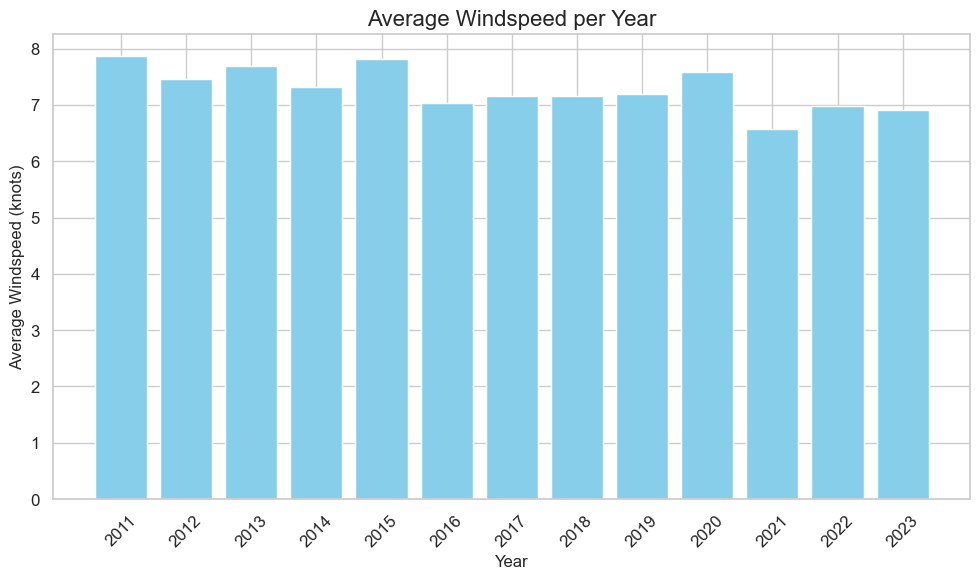

In [66]:
# Group by year and calculate average windspeed per year.
avg_wdsp_per_year = df.groupby('year')['wdsp'].mean().reset_index()

# Print the numeric output for each year's average air temperature.
print("Average Windspeed per Year:")
print(avg_wdsp_per_year)

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_wdsp_per_year['year'], avg_wdsp_per_year['wdsp'], color='skyblue')

# Title and labels.
plt.title('Average Windspeed per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Windspeed (knots)', fontsize=12)
plt.xticks(avg_wdsp_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html